# Практическое задание

In [1]:
# импорт нужных библиотек
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.lines as lines
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# отображение картинок в ячейках
%matplotlib inline

In [2]:
# импортируем файл, скаченный из kaggle
df = pd.read_csv('DataEngineer.csv', sep=',')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True


In [4]:
# определим, есть ли пропущенные значения
print(df.isnull().sum())

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64


Пропущенные значения отсутствуют.

### Очистка данных

In [5]:
# предварительная очистка

# уберем после названия компании управляющие символы
df['Company Name'] = df['Company Name'].str.replace('\n.*','')

In [6]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True


In [7]:
# разделим данные об локации на штат и город
Location = df['Location'].str.split(',', expand=True)

df['City'] = Location[0]
df['State'] = Location[1]

# разделим данные с 'to' на две колонки
size = df['Size'].str.replace('Unknown', '-1').str.split('to', expand=True)
changed_size = ['-1' if x is None else x for x in size[1]]
revenue = df['Revenue'].str.replace('Unknown / Non-Applicable', '-1').str.split('to', expand=True)

min_rev = revenue[0].str.replace('$', '')
max_rev = revenue[1].str.replace('$', '').str.split('million', expand=True)

changed_max_rev = max_rev[0].str.replace('employees', '')
changed_max_rev = ['-1' if x is None else x for x in changed_max_rev]

# разделим данные на min и max
salary = df['Salary Estimate'].str.split('-', expand=True)

df['Min Salary, K'] = salary[0].str.replace('$', '').str.replace('K', '')
df['Max Salary, K'] = salary[1].str.replace('$', '').str.replace('K', '').str.replace('\(G.*', '')

df['Min revenue, million (USD)'] = revenue[0].str.replace('$', '')
df['Max revenue, million (USD)'] = changed_max_rev

df['Min Size, employees'] = size[0]
df['Max Size, employees'] = changed_max_rev

In [8]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Competitors,Easy Apply,City,State,"Min Salary, K","Max Salary, K","Min revenue, million (USD)","Max revenue, million (USD)","Min Size, employees","Max Size, employees"
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,...,"WCI Consulting, PwC",-1,New York,NY,80,150,10,25,1,25
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,...,-1,-1,New York,NY,80,150,25,50,51,50
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,...,-1,-1,New York,NY,80,150,5,10,51,10
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,...,-1,-1,New York,NY,80,150,-1,-1,501,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,...,"Travelers, Chubb, Crum & Forster",True,New York,NY,80,150,100,500,201,500


In [9]:
# удалим ненужные столбцы
df.drop(['Salary Estimate', 'Size', 'Revenue'], axis=1, inplace=True)

In [10]:
df.tail()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Founded,Type of ownership,Industry,Sector,Competitors,Easy Apply,City,State,"Min Salary, K","Max Salary, K","Min revenue, million (USD)","Max revenue, million (USD)","Min Size, employees","Max Size, employees"
2523,Cloud Engineer,The Expertise You Have Proven expertise in dev...,4.5,PMG Global,"Westlake, TX","Herndon, VA",-1,Company - Private,Computer Hardware & Software,Information Technology,-1,-1,Westlake,TX,76,128,1,5,1,5
2524,Electrical Engineer,Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services,"Fort Worth, TX","Santa Clara, CA",1993,Company - Private,Staffing & Outsourcing,Business Services,-1,-1,Fort Worth,TX,76,128,5,10,51,10
2525,Sr. Big Data Engineer,Posting Title Principal Data Engineer (Contrac...,3.7,Cincinnati Bell Technology Solutions,"Irving, TX","Cincinnati, OH",-1,Company - Private,IT Services,Information Technology,-1,-1,Irving,TX,76,128,100,500,501,500
2526,Senior Big Data / ETL Engineer,"Your Opportunity\n\nCharles Schwab & Co., Inc ...",3.5,Schwab,"Westlake, TX","Dettenheim, Germany",-1,Company - Public,-1,-1,-1,-1,Westlake,TX,76,128,-1,-1,-1,-1
2527,Cloud Engineer,"Cloud Engineer Westlake, TX 6+ months Descript...",3.6,SPECTRAFORCE TECHNOLOGIES Inc.,"Westlake, TX","Raleigh, NC",2000,Company - Private,Staffing & Outsourcing,Business Services,-1,-1,Westlake,TX,76,128,25,50,501,50


In [11]:
# удалим дубликаты 
df['Job Title'].drop_duplicates().values

# заменим данные
df['Job Title'] = df['Job Title'].str.replace('Sr.', 'Senior')

In [12]:
df.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Founded,Type of ownership,Industry,Sector,Competitors,Easy Apply,City,State,"Min Salary, K","Max Salary, K","Min revenue, million (USD)","Max revenue, million (USD)","Min Size, employees","Max Size, employees"
0,Data Engineer,Company Description\nSagence is a management a...,4.5,Sagence,"New York, NY","Chicago, IL",2009,Company - Private,Consulting,Business Services,"WCI Consulting, PwC",-1,New York,NY,80,150,10,25,1,25
1,Senior Data Engineer (Healthcare Domain experi...,"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration,"New York, NY","Jacksonville, FL",1998,Company - Private,IT Services,Information Technology,-1,-1,New York,NY,80,150,25,50,51,50
2,Data Engineers,Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies,"New York, NY","Trenton, NJ",2003,Company - Private,IT Services,Information Technology,-1,-1,New York,NY,80,150,5,10,51,10
3,Client Trade Support Engineer,About the Position\n\n\nThis position will sup...,4.8,Jane Street,"New York, NY","New York, NY",2000,Company - Private,Investment Banking & Asset Management,Finance,-1,-1,New York,NY,80,150,-1,-1,501,-1
4,Data Engineer,Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies,"New York, NY","New York, NY",1914,Company - Private,Insurance Carriers,Insurance,"Travelers, Chubb, Crum & Forster",True,New York,NY,80,150,100,500,201,500


## Визуализация данных

### Построить график компаний с самым большим кол-вом вакансий

In [13]:
jobs_count = df['Job Title'].value_counts().rename_axis('Job Title').reset_index(name='Counts')

jobs_count

,Job Title,Counts
0,Data Engineer,469
1,Senior Data Engineer,138
2,Software Engineer,93
3,Big Data Engineer,73
4,Machine Learning Engineer,17
...,...,...
1247,Senior Data Engineer (AWS),1
1248,Data Center Hardware Engineer I,1
1249,Tier II TAC Engineer,1
1250,IT Support Engineer I,1


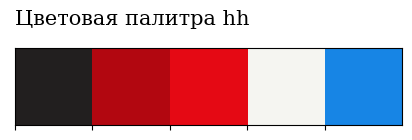

In [14]:
# фирменная палитра hh
cmap = sns.palplot(['#221f1f', '#b20710', '#e50914', '#f5f5f1', '#1785e5'])

plt.title("Цветовая палитра hh", loc='left', fontfamily='serif', fontsize=15, y=1.2)

plt.show()

In [15]:
# построим график компаний
jobs_company = df.groupby('Company Name', as_index=False)['Job Title'].count().sort_values('Job Title',ascending=False).reset_index()

# топ-5
data = jobs_company[:5]

data

,index,Company Name,Job Title
0,83,Amazon,28
1,760,Lockheed Martin,18
2,111,Apple,18
3,665,IntraEdge,16
4,597,Humana,16


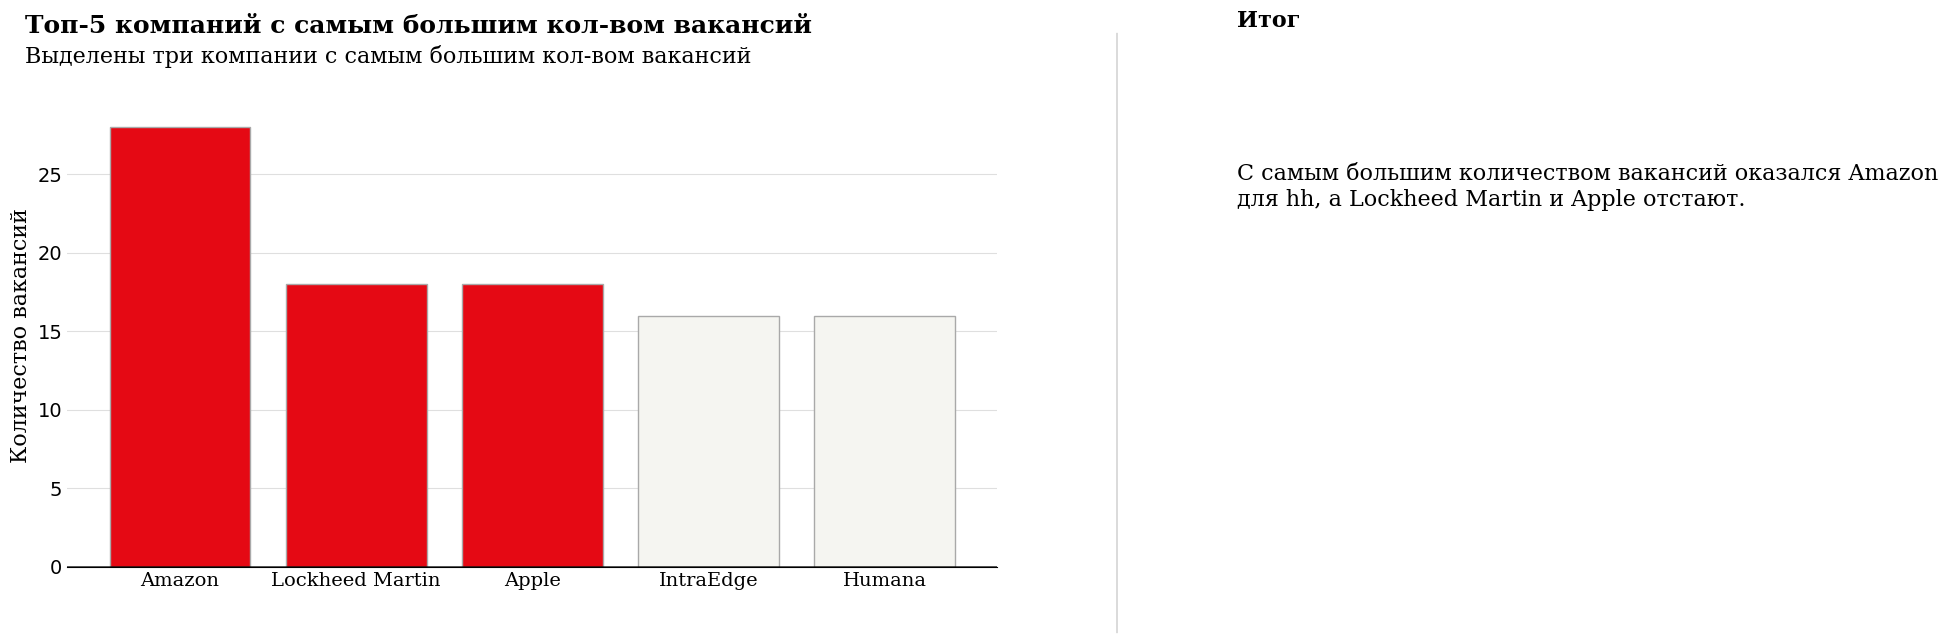

In [16]:
# график
color_map = ['#f5f5f1' for _ in range(10)]

# цветовое решение
color_map[0] = color_map[1] = color_map[2] = '#e50914' 

fig, ax = plt.subplots(
    1,
    1,
    figsize=(12, 6)
)

ax.bar(
    data['Company Name'], 
    data['Job Title'], 
    edgecolor='darkgray',
    color = color_map
)

# удаление границ графика
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# надписи
ax.set_xticklabels(
    data['Company Name'], 
    fontfamily='serif', 
    rotation=0
)

# заголовок и подзаголовок
fig.text(
    0.09, 
    1, 
    'Топ-5 компаний с самым большим кол-вом вакансий',
    fontsize=18,
    fontweight='bold',
    fontfamily='serif'
)

fig.text(
    0.09,
    0.95,
    'Выделены три компании с самым большим кол-вом вакансий',
    fontsize=16,
    fontweight='light',
    fontfamily='serif'
)

fig.text(
    1.1,
    1.01,
    'Итог',
    fontsize=16,
    fontweight='bold',
    fontfamily='serif'
)

fig.text(
    1.1,
    0.67,
    '''
С самым большим количеством вакансий оказался Amazon
для hh, а Lockheed Martin и Apple отстают.
''',
    fontsize=16, 
    fontweight='light',
    fontfamily='serif'
)

ax.grid(
    axis='y',
    linestyle='-',
    alpha=0.4
)

grid_y_ticks = np.arange(0, 30, 5) 
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.ylabel(
    'Количество вакансий',
    fontfamily='serif',
    fontsize=16
)

plt.axhline(
    y=0,
    color='black',
    linewidth=1.3,
    alpha=.7
)

ax.tick_params(
    axis='both',
    which='major',
    labelsize=14
)

l1 = lines.Line2D(
    [1, 1], 
    [0, 1], 
    transform=fig.transFigure, 
    figure=fig, 
    color='black', 
    lw=0.2
)

fig.lines.extend([l1])

ax.tick_params(
    axis=u'both', 
    which=u'both',
    length=0
)

plt.show()

### Построить график самых популярных названий в вакансиях

In [17]:
# сократим для графика 'Engineer' до 'Engr' и 'Machine Learning' до 'ML'
jobs_count['Job Title'] = jobs_count['Job Title'].str.replace('Engineer', 'Engr').str.replace('Machine Learning Engr', 'ML-Engr')

# топ-5
data = jobs_count[:5]

data

,Job Title,Counts
0,Data Engr,469
1,Senior Data Engr,138
2,Software Engr,93
3,Big Data Engr,73
4,ML-Engr,17


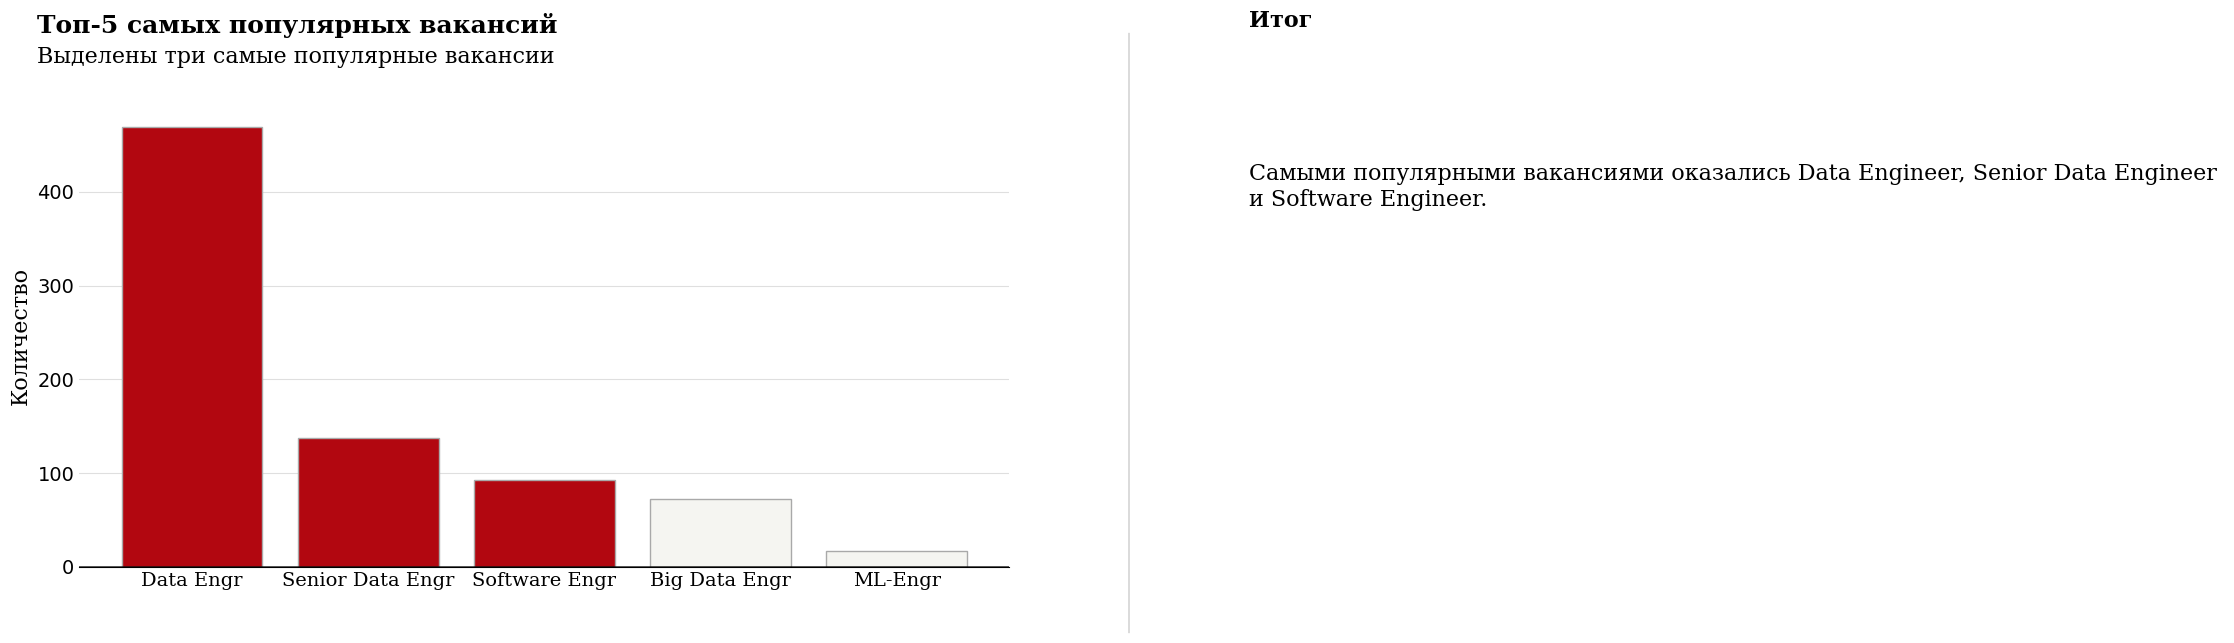

In [18]:
# график
color_map = ['#f5f5f1' for _ in range(10)]

# цветовое решение
color_map[0] = color_map[1] = color_map[2] = '#b20710' 

fig, ax = plt.subplots(
    1,
    1,
    figsize=(12, 6)
)

ax.bar(
    data['Job Title'],
    data['Counts'], 
    edgecolor='darkgray',
    color=color_map
)

# удаление границ графика
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# надписи
ax.set_xticklabels(
    data['Job Title'],
    fontfamily='serif',
    rotation=0
)

# заголовок и подзаголовок
fig.text(
    0.09,
    1,
    'Топ-5 самых популярных вакансий',
    fontsize=18,
    fontweight='bold',
    fontfamily='serif'
)

fig.text(
    0.09,
    0.95,
    'Выделены три самые популярные вакансии',
    fontsize=16,
    fontweight='light',
    fontfamily='serif'
)

fig.text(
    1.1,
    1.01,
    'Итог',
    fontsize=16,
    fontweight='bold',
    fontfamily='serif'
)

fig.text(
    1.1,
    0.67,
    '''
Самыми популярными вакансиями оказались Data Engineer, Senior Data Engineer 
и Software Engineer.
''',
    fontsize=16,
    fontweight='light',
    fontfamily='serif'
)

ax.grid(
    axis='y',
    linestyle='-',
    alpha=0.4
)

grid_y_ticks = np.arange(0, 500, 100) 
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.ylabel(
    'Количество',
    fontfamily='serif',
    fontsize=16
)

plt.axhline(
    y=0,
    color='black',
    linewidth=1.3,
    alpha=.7
)

ax.tick_params(
    axis='both',
    which='major',
    labelsize=14
)

l1 = lines.Line2D(
    [1, 1],
    [0, 1],
    transform=fig.transFigure,
    figure=fig,
    color='black',
    lw=0.2
)

fig.lines.extend([l1])

ax.tick_params(
    axis=u'both',
    which=u'both',
    length=0
)

plt.show()

### Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму

In [19]:
#определим количество вакансий в каждом из регионов
populate_regions = df.groupby('State', as_index=False)['Job Title'].count()

df_polar = populate_regions.sort_values('Job Title', ascending=False)[:5]

df_polar

,State,Job Title
8,TX,1000
1,CA,600
0,AZ,200
4,IL,200
6,NY,187


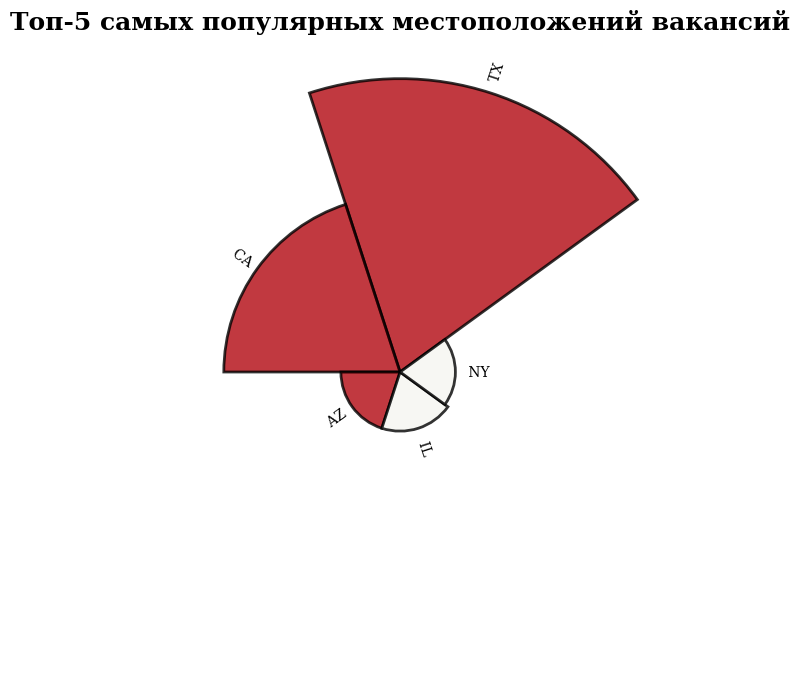

In [20]:
# создать рисунок
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# константы = параметры, управляющие расположением графика:
upper_limit = 30
lower_limit = 1
label_padding = 30

# вычисление максимального и минимального значений в наборе данных
max_val = df_polar['Job Title'].max()

# вычислим высоты: они представляют собой преобразование значения каждого элемента в новые координаты
slope = (max_val - lower_limit) / max_val
heights = slope * df_polar['Job Title'] + lower_limit

# вычислим ширину каждой столбика. В общей сложности мы имеем 2*Pi = 360°
width = 2 * np.pi / len(df_polar['Job Title'])

# вычисление угла
indexes = list(range(1, len(df_polar.index) + 1))
angles = [element * width for element in indexes]
angles

# столбики
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lower_limit,
    linewidth=2, 
    edgecolor="black",
    color=color_map,
    alpha=0.8
)

# название графика
plt.title(
    'Топ-5 самых популярных местоположений вакансий',
    fontsize=18,
    fontweight='bold',
    fontfamily='serif'
)

# добавить надписи
for bar, angle, height, label in zip(bars, angles, heights, df_polar["State"]):
    
    # надписи вращаются. Вращение должно быть указано в градусах
    rotation = np.rad2deg(angle)

    alignment = ""
    if angle >= np.pi / 2 and angle < 3 * np.pi / 2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # наконец, добавляем надписи
    ax.text(
        x = angle, 
        y = lower_limit + bar.get_height() + label_padding, 
        s = label, 
        ha = alignment, fontsize=10,
        fontfamily='serif',
        va = 'center', 
        rotation = rotation, 
        rotation_mode = "anchor"
    ) 

### Построить график популярности по колонке Type of ownership, относительно численности вакансий

In [21]:
popularity = df.groupby('Type of ownership',as_index=False)['Job Title'].count().sort_values('Job Title',ascending=False)[:10]

popularity

,Type of ownership,Job Title
2,Company - Private,1392
3,Company - Public,754
12,Subsidiary or Business Segment,126
0,-1,119
7,Nonprofit Organization,48
13,Unknown,30
5,Government,21
1,College / University,13
4,Contract,10
9,Private Practice / Firm,6


In [22]:
# удалим строку, где значение type of ownership = -1 и Unknown
popularity_1 = popularity.drop(index=[0, 13]) 

popularity_1

,Type of ownership,Job Title
2,Company - Private,1392
3,Company - Public,754
12,Subsidiary or Business Segment,126
7,Nonprofit Organization,48
5,Government,21
1,College / University,13
4,Contract,10
9,Private Practice / Firm,6


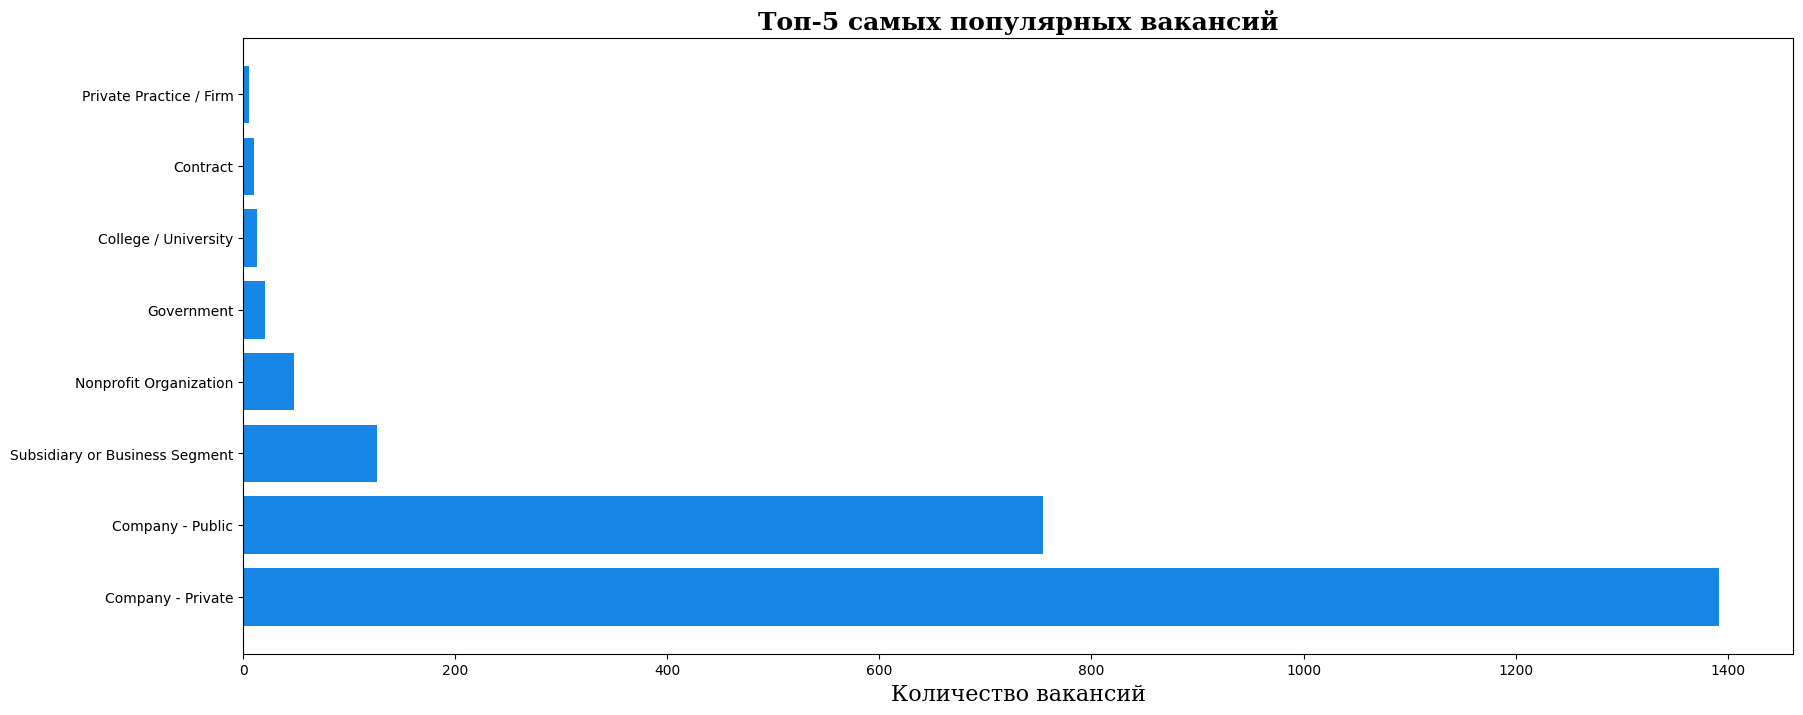

In [23]:
plt.figure(figsize=(20,8))

plt.barh(popularity_1['Type of ownership'], popularity_1['Job Title'], color='#1785e5')

# заголовок
plt.title(
    'Топ-5 самых популярных вакансий',
    fontsize=18,
    fontweight='bold',
    fontfamily='serif'
)

# подпись
plt.xlabel(
    'Количество вакансий',
    fontfamily='serif',
    fontsize=16
)

plt.show()

## Построить график популярности по секторам работы

In [24]:
pop_sectors = df.groupby('Sector', as_index=False)['Job Title'].count()

# удалим строку, где значение -1
df_polar = pop_sectors.drop([0]).sort_values('Job Title', ascending=False)[:10]

df_polar

,Sector,Job Title
13,Information Technology,890
6,Business Services,416
10,Finance,177
2,Aerospace & Defense,94
15,Manufacturing,93
14,Insurance,82
16,Media,52
12,Health Care,51
18,"Oil, Gas, Energy & Utilities",37
21,Retail,36


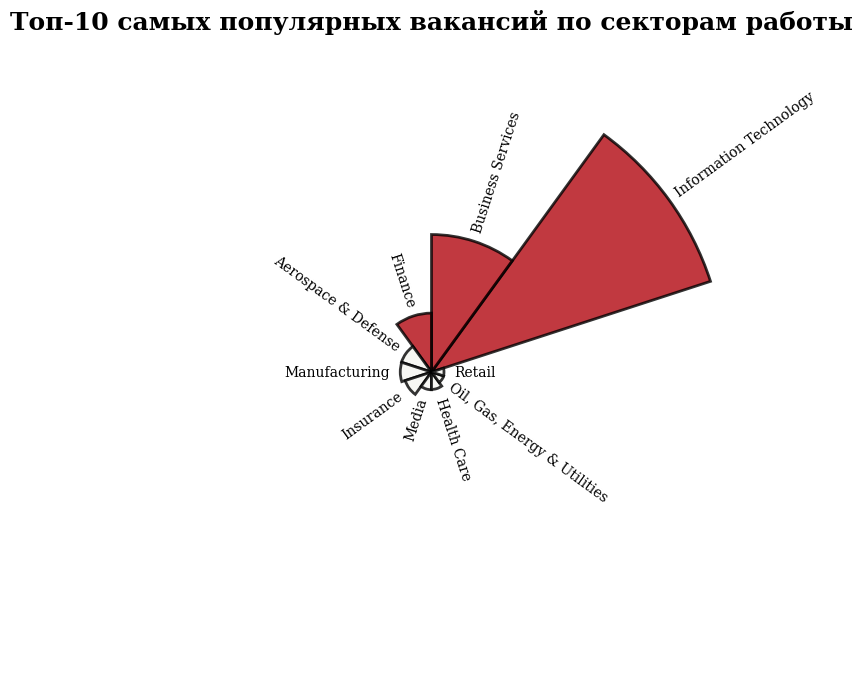

In [25]:
# создать рисунок
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# константы = параметры, управляющие расположением графика:
upper_limit = 30
lower_limit = 1
label_padding = 30

# вычисление максимального и минимального значений в наборе данных
max_val = df_polar['Job Title'].max()

# вычислим высоты: они представляют собой преобразование значения каждого элемента в новые координаты
slope = (max_val - lower_limit) / max_val
heights = slope * df_polar['Job Title'] + lower_limit

# вычислим ширину каждой столбика. В общей сложности мы имеем 2*Pi = 360°
width = 2 * np.pi / len(df_polar['Job Title'])

# вычисление угла
indexes = list(range(1, len(df_polar.index) + 1))
angles = [element * width for element in indexes]
angles

# столбики
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lower_limit,
    linewidth=2, 
    edgecolor="black",
    color=color_map,
    alpha=0.8
)

# название графика
plt.title(
    'Топ-10 самых популярных вакансий по секторам работы',
    fontsize=18,
    fontweight='bold',
    fontfamily='serif'
)

# добавить надписи
for bar, angle, height, label in zip(bars, angles, heights, df_polar["Sector"]):
    
    # надписи вращаются. Вращение должно быть указано в градусах
    rotation = np.rad2deg(angle)

    alignment = ""
    if angle >= np.pi / 2 and angle < 3 * np.pi / 2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # наконец, добавляем надписи
    ax.text(
        x = angle, 
        y = lower_limit + bar.get_height() + label_padding, 
        s = label, 
        ha = alignment, fontsize=10,
        fontfamily='serif',
        va = 'center', 
        rotation = rotation, 
        rotation_mode = "anchor"
    ) 

### Построить график используя сектора работы и средний уровень зарплат в них

In [26]:
# подготовим данные, уберем лишнее
df['Min Salary, K'] = df['Min Salary, K'].str.strip().str.lstrip()

df['Max Salary, K'] = df['Max Salary, K'].str.strip().str.lstrip()

df['Max Salary, K'].drop_duplicates().values

df['Max Salary, K'] = df['Max Salary, K'].str.replace('\(Employer est.\)', '')

In [27]:
# преобразование типов
type_dict = {
    'Max Salary, K': int,
    'Min Salary, K': int
}

df = df.astype(type_dict)

In [28]:
df1 = df.groupby('State', as_index=False)['Min Salary, K', 'Max Salary, K'].mean()

df1

,State,"Min Salary, K","Max Salary, K"
0,AZ,76.815000,121.510000
1,CA,99.918333,155.318333
2,DE,79.625000,146.312500
3,FL,38.640625,85.312500
4,IL,81.730000,123.440000
5,NJ,74.875000,119.333333
6,NY,81.235294,117.529412
7,PA,71.861272,129.601156
8,TX,67.851000,111.791000


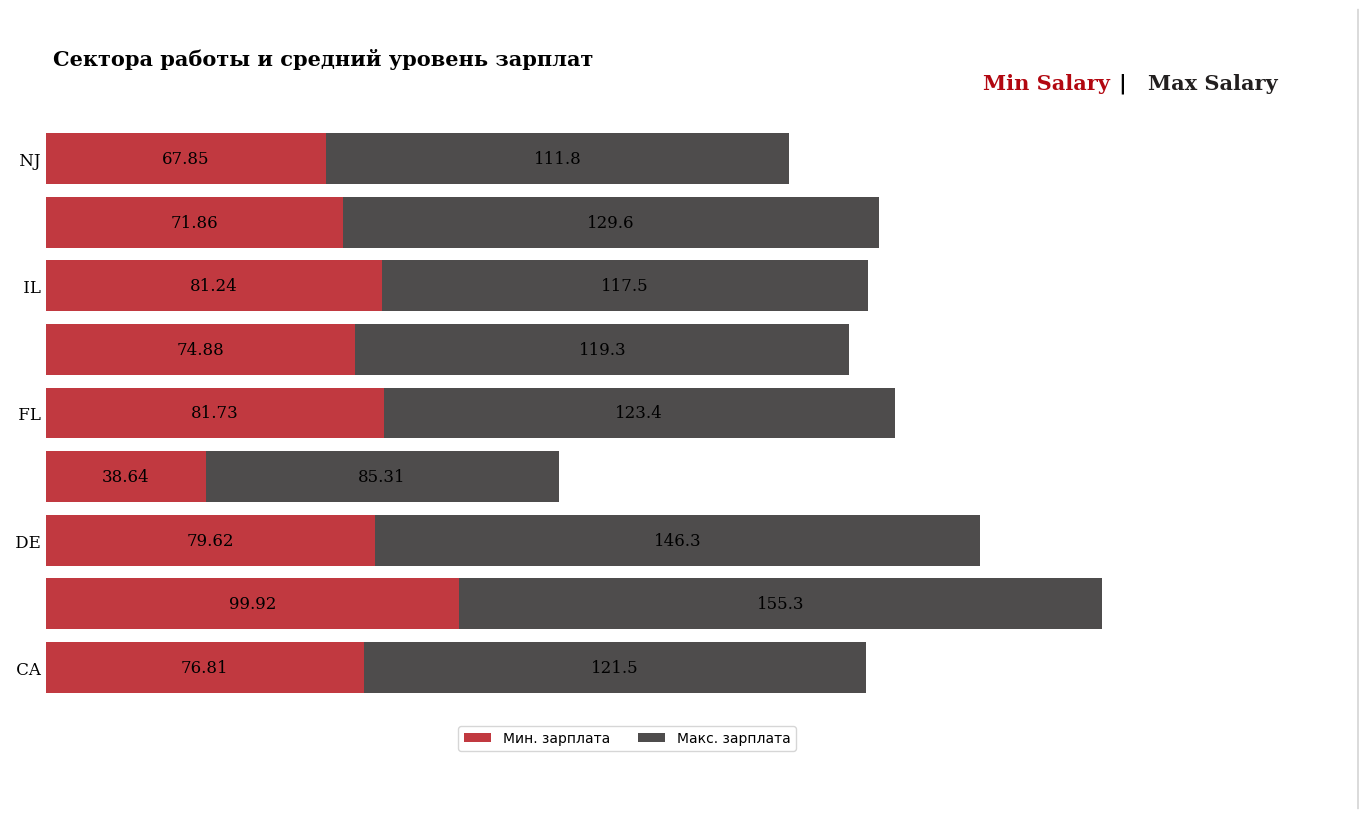

In [29]:
# график
fig, ax = plt.subplots(1, 1, figsize=(15, 8),)

ax.barh(
    df1.index,
    df1['Min Salary, K'],
    color='#b20710',
    alpha=0.8,
    label='Мин. зарплата'
)

ax.barh(
    df1.index,
    df1['Max Salary, K'],
    left=df1['Min Salary, K'],
    color='#221f1f',
    alpha=0.8,
    label='Макс. зарплата'
)

ax.set_xlim(0, 281)
ax.set_xticks([])
ax.set_yticklabels(df1['State'], fontfamily='serif', fontsize=11)

# процент
for i in df1['Min Salary, K'].index:
    ax.annotate(
        f"{df1['Min Salary, K'][i]:.4}",
        xy=(df1['Min Salary, K'][i]/2, i),
        va = 'center',
        ha='center',
        fontsize=12,
        fontweight='light',
        fontfamily='serif',
        color='black'
    )

for i in df1['Min Salary, K'].index:
    ax.annotate(
        f"{df1['Max Salary, K'][i]:.4}",
        xy=(df1['Min Salary, K'][i]+df1['Max Salary, K'][i]/2, i),
        va = 'center', 
        ha='center',
        fontsize=12,
        fontweight='light',
        fontfamily='serif',
        color='black'
    )
    
fig.text(
    0.13,
    0.93,
    'Сектора работы и средний уровень зарплат',
    fontsize=15,
    fontweight='bold',
    fontfamily='serif'
)   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.legend(
    loc='lower center',
    ncol=3,
    bbox_to_anchor=(0.5, -0.06)
)

fig.text(
    0.75,
    0.9,
    "Min Salary",
    fontweight="bold",
    fontfamily='serif',
    fontsize=15,
    color='#b20710'
)

fig.text(
    0.84,
    0.9,
    "|",
    fontweight="bold",
    fontfamily='serif',
    fontsize=15,
    color='black'
)

fig.text(
    0.86,
    0.9,
    "Max Salary",
    fontweight="bold",
    fontfamily='serif',
    fontsize=15,
    color='#221f1f'
)

l1 = lines.Line2D(
    [1, 1],
    [0, 1],
    transform=fig.transFigure,
    figure=fig,
    color='black',
    lw=0.2
)

fig.lines.extend([l1])

ax.tick_params(
    axis='both',
    which='major',
    labelsize=12
)

ax.tick_params(
    axis=u'both',
    which=u'both',
    length=0
)

plt.show()

## Построить гистограмму распределения рейтинга компаний

In [30]:
# удалим строку, где значение -1
df_pop = df.drop(index=df[df['Rating']==-1].index)

df_pop['Rating'].head()

0    4.5
1    3.4
2    5.0
3    4.8
4    3.7
Name: Rating, dtype: float64

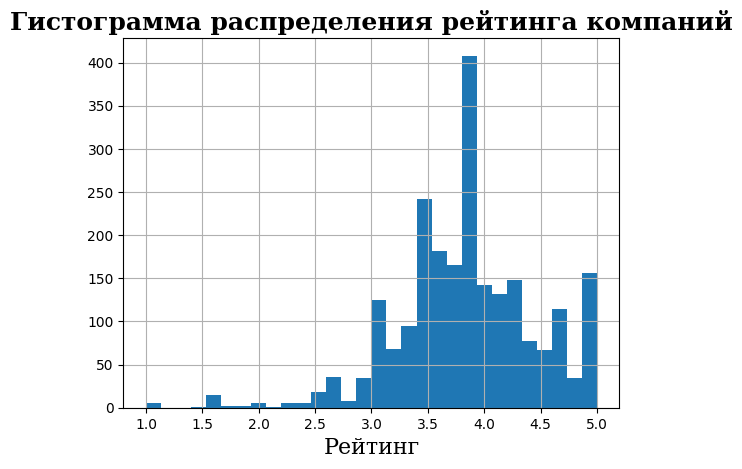

In [31]:
df_pop['Rating'].hist(bins=30)

# заголовок
plt.title(
    'Гистограмма распределения рейтинга компаний',
    fontsize=18,
    fontweight='bold',
    fontfamily='serif'
)

# подпись
plt.xlabel(
    'Рейтинг',
    fontfamily='serif',
    fontsize=16
)

plt.show()

## Построить график средних зарплат по популярным компаниям

In [32]:
# средняя зарплата
df['Mean Salary, K'] = df['Max Salary, K'] + df['Min Salary, K'] / 2

df.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Founded,Type of ownership,Industry,Sector,...,Easy Apply,City,State,"Min Salary, K","Max Salary, K","Min revenue, million (USD)","Max revenue, million (USD)","Min Size, employees","Max Size, employees","Mean Salary, K"
0,Data Engineer,Company Description\nSagence is a management a...,4.5,Sagence,"New York, NY","Chicago, IL",2009,Company - Private,Consulting,Business Services,...,-1,New York,NY,80,150,10,25,1,25,190.0
1,Senior Data Engineer (Healthcare Domain experi...,"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration,"New York, NY","Jacksonville, FL",1998,Company - Private,IT Services,Information Technology,...,-1,New York,NY,80,150,25,50,51,50,190.0
2,Data Engineers,Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies,"New York, NY","Trenton, NJ",2003,Company - Private,IT Services,Information Technology,...,-1,New York,NY,80,150,5,10,51,10,190.0
3,Client Trade Support Engineer,About the Position\n\n\nThis position will sup...,4.8,Jane Street,"New York, NY","New York, NY",2000,Company - Private,Investment Banking & Asset Management,Finance,...,-1,New York,NY,80,150,-1,-1,501,-1,190.0
4,Data Engineer,Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies,"New York, NY","New York, NY",1914,Company - Private,Insurance Carriers,Insurance,...,True,New York,NY,80,150,100,500,201,500,190.0


In [33]:
pop_mean = df.groupby('Company Name', as_index=False)['Mean Salary, K'].sum().sort_values('Mean Salary, K',ascending=False).reset_index()

df_polar = pop_mean[:8]

df_polar

,index,Company Name,"Mean Salary, K"
0,83,Amazon,4702.5
1,111,Apple,3603.5
2,789,"Management Decisions, Inc.",2859.0
3,760,Lockheed Martin,2651.5
4,665,IntraEdge,2402.5
5,541,Google,2341.5
6,251,Capital One,2105.0
7,780,MUFG,2071.0


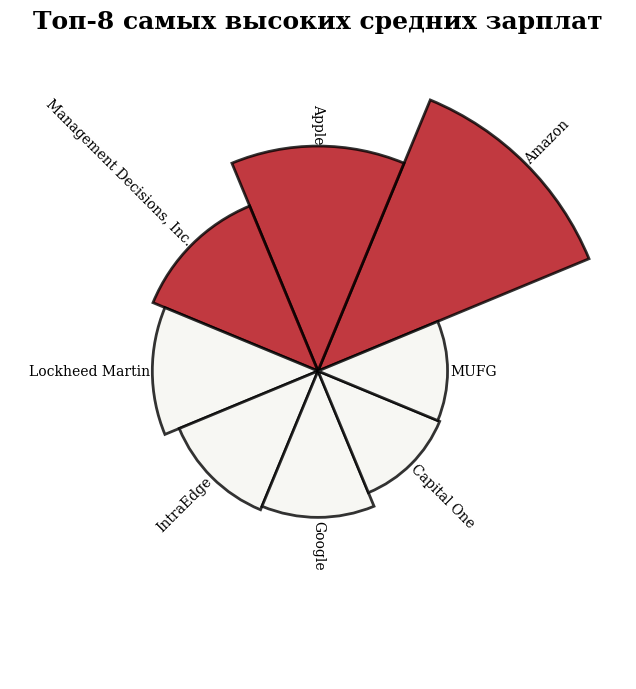

In [34]:
# создать рисунок
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# константы = параметры, управляющие расположением графика:
upper_limit = 30
lower_limit = 5
label_padding = 40

# вычисление максимального и минимального значений в наборе данных
max_val = df_polar['Mean Salary, K'].max()

# вычислим высоты: они представляют собой преобразование значения каждого элемента в новые координаты
slope = (max_val - lower_limit) / max_val
heights = slope * df_polar['Mean Salary, K'] + lower_limit

# вычислим ширину каждой столбика. В общей сложности мы имеем 2*Pi = 360°
width = 2 * np.pi / len(df_polar['Mean Salary, K'])

# вычисление угла
indexes = list(range(1, len(df_polar.index) + 1))
angles = [element * width for element in indexes]
angles

# столбики
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lower_limit,
    linewidth=2, 
    edgecolor="black",
    color=color_map,
    alpha=0.8
)

# название графика
plt.title(
    'Топ-8 самых высоких средних зарплат',
    fontsize=18,
    fontweight='bold',
    fontfamily='serif'
)

# добавить надписи
for bar, angle, height, label in zip(bars, angles, heights, df_polar['Company Name']):
    
    # надписи вращаются. Вращение должно быть указано в градусах
    rotation = np.rad2deg(angle)

    alignment = ""
    if angle >= np.pi / 2 and angle < 3 * np.pi / 2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # наконец, добавляем надписи
    ax.text(
        x = angle, 
        y = lower_limit + bar.get_height() + label_padding, 
        s = label, 
        ha = alignment, fontsize=10,
        fontfamily='serif',
        va = 'center', 
        rotation = rotation, 
        rotation_mode = "anchor"
    ) 

## Построить по описанию вакансий облако тегов, исследовать самые популярные слова

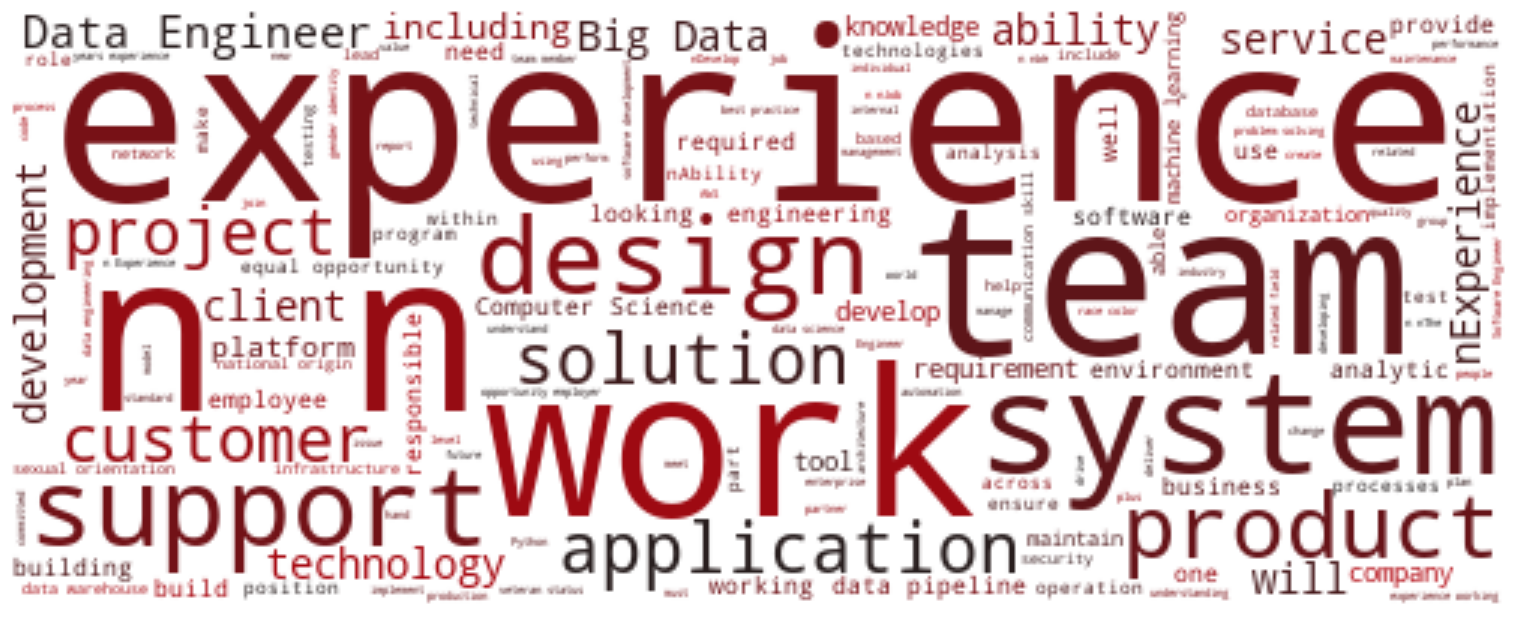

In [35]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

# пользовательская цветовая палитра
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#b20710', '#221f1f'])

text = str(list(df['Job Description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

wordcloud = WordCloud(background_color='white', width=500, height=200, colormap=cmap, max_words=150).generate(text)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()